In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 28.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/sample_data/DailyTemps.csv',parse_dates=['DATE'],index_col="DATE")

In [11]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [16]:
df.shape

(1821, 5)

In [19]:
X=df[["AvgTemp"]]

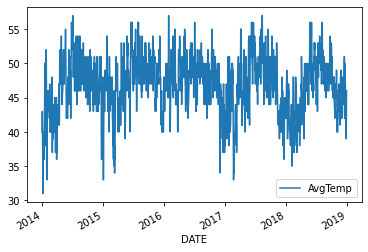

In [20]:
X.plot()

In [21]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(X)
p_val=res[1]
if p_val>0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


In [22]:
from pmdarima import auto_arima

In [23]:
auto_arima=auto_arima(X,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.95 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=4.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.82 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.42 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=5.14 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [27]:
train_len=int(len(X)*0.8)

In [29]:
train=X.iloc[:train_len]
test=X.iloc[train_len:]
print(train.shape)
print(test.shape)

(1456, 1)
(365, 1)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

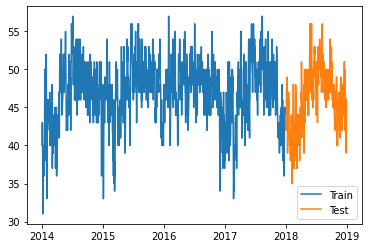

In [31]:
plt.plot(train ,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [33]:
start=len(train)
end=len(X)-1
print(start,end)

1456 1820


In [34]:
ypred_test=model_fit.predict(start=start,end=end)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
ypred_test

In [40]:
date_pred=pd.date_range(start="2017-12-30",end="2018-12-29")

In [ ]:
date_pred

In [42]:
ypred_test.index=date_pred

In [ ]:
ypred_test

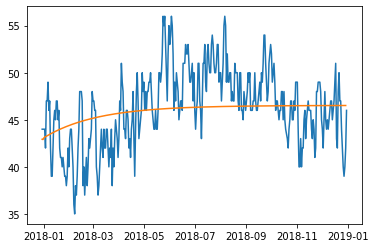

In [47]:
plt.plot(test)
plt.plot(ypred_test)

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(test,ypred_test)
mae=mean_absolute_error(test,ypred_test)
print("MSE is ",mse)
print("RMSE is ",np.sqrt(mse))
print("MAE is",mae)

MSE is  14.341748045487046
RMSE is  3.787050045284198
MAE is 3.0466767821164717
